<a href="https://colab.research.google.com/github/CarlosCR07/Miner-a-de-Datos/blob/main/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Carlos Castelan Ramos**
 - Práctica 3.1 - Aplicación de Clustering - KMEDIAS

In [341]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [342]:
transaccion = pd.read_csv("/content/transacciones.csv", encoding='latin1')
transaccion

,Sector,Marca,Linea_2,Sublinea_2,Presentacion,Gramaje_2,Empresa,Año,Fecha,Cliente,...,Fecha_2,Year,Quarter,Month,Day,Dia_Num_Sem,Dia_Semana_,IND_Compra,IND_Precio_Sospech_15,IND_PrecioSospech20
0,CARNES FRIAS,MARCA MAY,JAMONES,PECHUGA,PAQUETERIA,0.26,303012 CORPORATIVO BETA COMERCIAL,2014,01-01-14,129070 LOPEZ RA,...,01-01-14,2014,1,1,1,3,Miercoles,0,1,1
1,QUESOS,MARCA TLA,Q-MADURADOS,MANCHEGO,PAQUETERIA,0.40,303012 CORPORATIVO BETA COMERCIAL,2014,01-01-14,129070 LOPEZ RA,...,01-01-14,2014,1,1,1,3,Miercoles,0,1,1
2,QUESOS,MARCA CHIA,Q-FRESCOS,PANELA,PAQUETERIA,0.40,303012 CORPORATIVO BETA COMERCIAL,2014,01-01-14,129070 LOPEZ RA,...,01-01-14,2014,1,1,1,3,Miercoles,0,1,1
3,COMIDAS PREPARADAS,CHEF,POLLO,CONGELADO,PAQUETERIA,0.45,303012 CORPORATIVO BETA COMERCIAL,2014,01-01-14,129070 LOPEZ RA,...,01-01-14,2014,1,1,1,3,Miercoles,0,1,1
4,CARNES FRIAS,MARCA HID,SALCHICHA,SALCHICHA TRADICIONA,PAQUETERIA,0.55,303012 CORPORATIVO BETA COMERCIAL,2014,01-01-14,129070 LOPEZ RA,...,01-01-14,2014,1,1,1,3,Miercoles,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58898,CARNES FRIAS,MARCA MON,ESPECIALIDADES,LOMO,GRANEL,0.80,999233 BETA DULCES NOMBRES,2016,30-12-16,228476 HUGO SER,...,30-12-16,2016,4,12,30,5,Viernes,0,0,0
58899,QUESOS,MARCA TLA,Q-MADURADOS,MANCHEGO,PAQUETERIA,1.00,999233 BETA DULCES NOMBRES,2016,30-12-16,228476 HUGO SER,...,30-12-16,2016,4,12,30,5,Viernes,0,0,0
58900,CARNES FRIAS,MARCA PUE,CHORIZOS,CHORIZOS FRESCOS,PAQUETERIA,0.40,999233 BETA DULCES NOMBRES,2016,30-12-16,218563 DAVID R,...,30-12-16,2016,4,12,30,5,Viernes,0,0,0
58901,CARNES FRIAS,BETA SIN MARCA,JAMONES,JAMON PIERNA,GRANEL,3.50,999233 BETA DULCES NOMBRES,2016,30-12-16,230503 REYNALDO,...,30-12-16,2016,4,12,30,5,Viernes,0,0,0


#**PRIMER ANÁLISI DE CLUSTERS**

In [376]:
X = np.array(transaccion[["Pedido","Control","Producto"]])
y = np.array(transaccion['Quarter'])
X.shape

(58903, 3)

In [377]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[9.52572564e+04 5.49372633e+03 5.49372633e+03]
 [1.03439733e+05 7.00137449e+07 7.00137449e+07]
 [1.03685214e+05 7.00785644e+07 7.00785644e+07]
 [7.85448116e+04 5.24587229e+03 5.24587229e+03]
 [1.11224461e+05 5.72839474e+03 5.72839474e+03]]


In [378]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
color=['plum','teal','coral','cyan','silver']
asignar=[]
for row in labels:
    asignar.append(color[row])

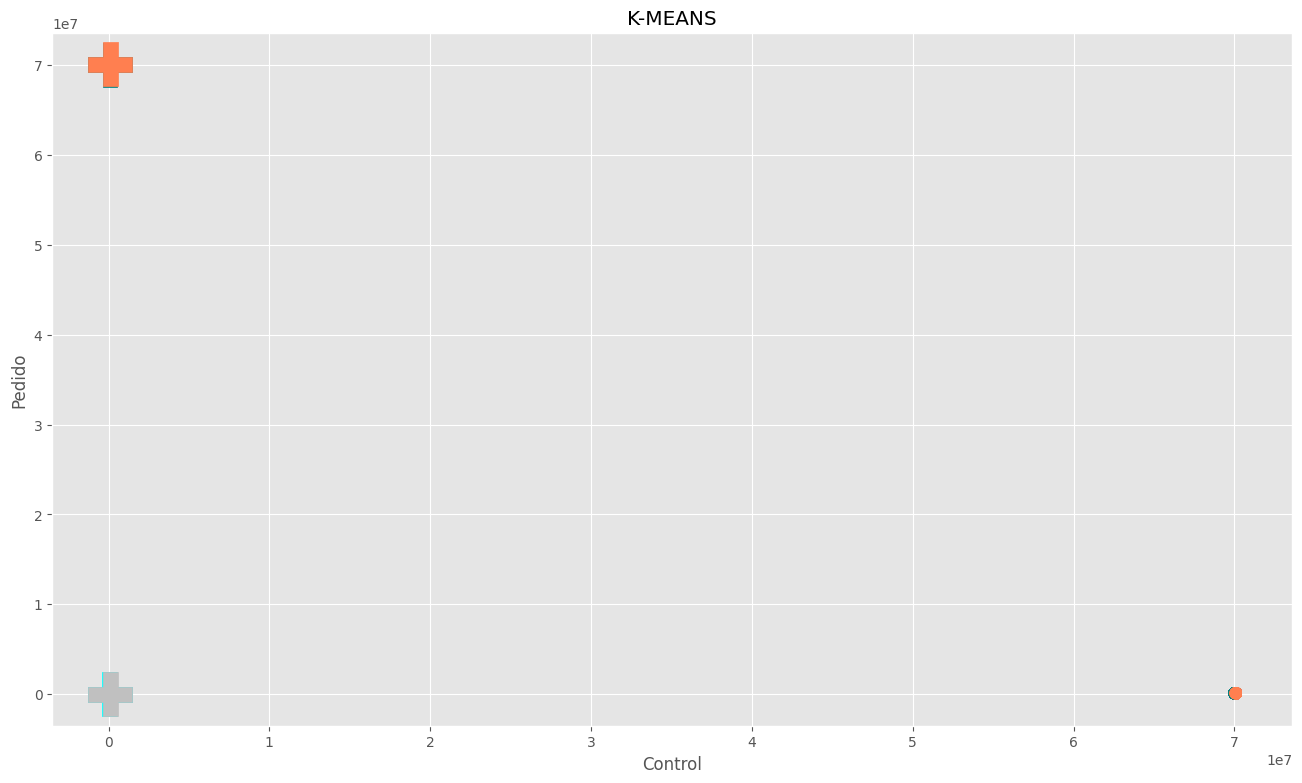

In [379]:
# Getting the values and plotting it
ejeX1 = transaccion['Producto'].values
ejeY1 = transaccion['Pedido'].values

plt.title("K-MEANS")
plt.xlabel("Control")
plt.ylabel("Pedido")
plt.scatter(ejeX1, ejeY1, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='P', c=color, s=1000)
plt.show()

# **SEGUNDO ANÁLISIS DE CLUSTERS**

In [372]:
X1 = np.array(transaccion[["Antiguedad","Edad","No._Hijos"]])
y1 = np.array(transaccion['Quarter'])
X1.shape

(58903, 3)

In [373]:
kmeans = KMeans(n_clusters=5).fit(X1)
centroids = kmeans.cluster_centers_
print(centroids)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[10.65387763 37.04409492  0.35121375]
 [ 3.94743865 29.7521563   0.11222302]
 [10.25605901 57.86775553  0.72813488]
 [26.29281397 48.76796508  1.80456682]
 [ 7.84951105 45.02462876  0.98895328]]


In [374]:
# Predicting the clusters
labels = kmeans.predict(X1)
# Getting the cluster centers
C = kmeans.cluster_centers_
color=['plum','teal','coral','cyan','silver']
asignar=[]
for row in labels:
    asignar.append(color[row])

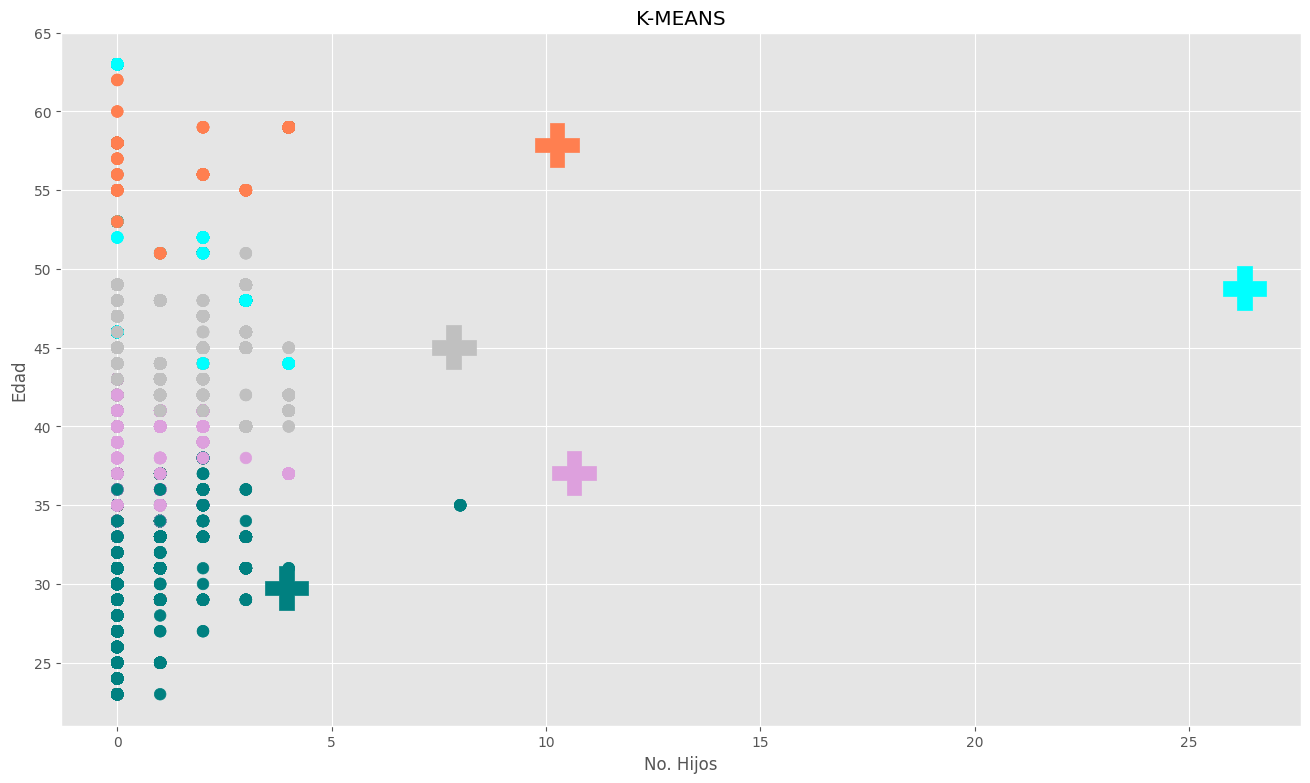

In [375]:
# Getting the values and plotting it
ejeX = transaccion['No._Hijos'].values
ejeY = transaccion['Edad'].values

plt.title("K-MEANS")
plt.xlabel("No. Hijos")
plt.ylabel("Edad")
plt.scatter(ejeX, ejeY, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='P', c=color, s=1000)
plt.show()

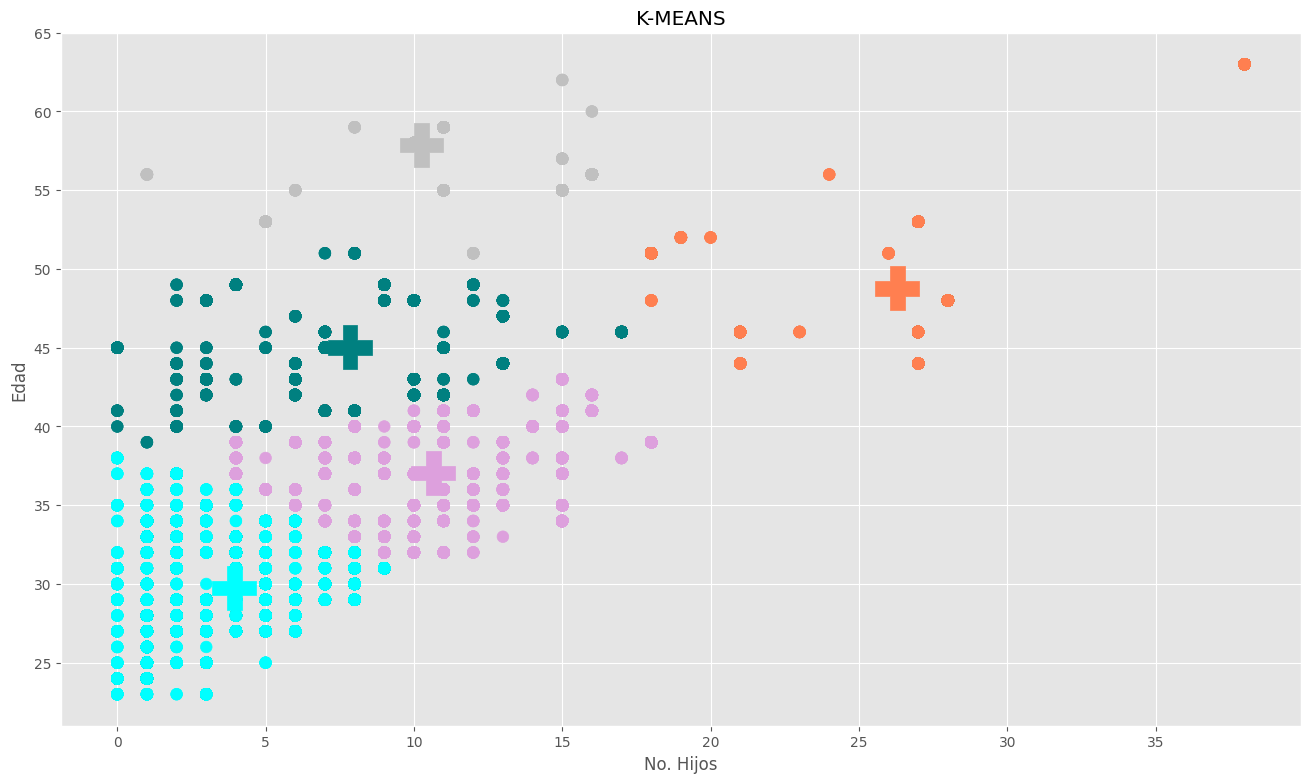

In [360]:
# Getting the values and plotting it
ejeX = transaccion['Antiguedad'].values
ejeY = transaccion['Edad'].values

plt.title("K-MEANS")
plt.xlabel("No. Hijos")
plt.ylabel("Edad")
plt.scatter(ejeX, ejeY, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='P', c=color, s=1000)
plt.show()